In [144]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [145]:
df = pd.read_csv('../data/processed_data/accept_downsampled_by_hardship.csv')

In [147]:
df_no_index = df.iloc[:, 1:]

In [148]:
df_clean = df_no_index.dropna()

In [149]:
X_train, X_val_test, y_train, y_val_test = train_test_split(df_clean, df_clean['hardship'], test_size=0.3, random_state=150000)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.7, random_state=150000)

In [150]:
credit = ['revol_bal',
'out_prncp',
'tot_cur_bal',
'out_prncp',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'fico_range_low',
'fico_range_high',
'delinq_2yrs',
'mths_since_last_delinq',
'pub_rec',
'acc_now_delinq',
'delinq_amnt',
'num_tl_90g_dpd_24m',
'percent_bc_gt_75',
'open_acc',
'total_rev_hi_lim',
]

macro = ['gdp', 'unemployment_insur','dividend']

demo = ['emp_length', 'annual_inc', 'dti'] + ['WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE',
       'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE',
       'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_MALE', 'BAC_FEMALE',
       'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE', 'AAC_FEMALE', 'NAC_MALE',
       'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE', 'NHWA_MALE', 'NHWA_FEMALE',
       'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE', 'NHIA_FEMALE', 'NHAA_MALE',
       'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE', 'NHTOM_MALE', 'NHTOM_FEMALE',
       'NHWAC_MALE', 'NHWAC_FEMALE', 'NHBAC_MALE', 'NHBAC_FEMALE',
       'NHIAC_MALE', 'NHIAC_FEMALE', 'NHAAC_MALE', 'NHAAC_FEMALE',
       'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE', 'H_FEMALE', 'HWA_MALE',
       'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE', 'HIA_MALE', 'HIA_FEMALE',
       'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE', 'HNA_FEMALE', 'HTOM_MALE',
       'HTOM_FEMALE', 'HWAC_MALE', 'HWAC_FEMALE', 'HBAC_MALE', 'HBAC_FEMALE',
       'HIAC_MALE', 'HIAC_FEMALE', 'HAAC_MALE', 'HAAC_FEMALE', 'HNAC_MALE',
       'HNAC_FEMALE']

other = ['id'] 

label = ['hardship']

In [152]:
df_demo = df_clean[demo]

In [153]:
df_credit = df_clean[credit]

In [154]:
df_marco = df_clean[macro]

In [155]:
pca_demo = PCA(n_components=3)
pca_demo.fit(df_demo)
print(pca_demo.explained_variance_ratio_)
print(pca_demo.singular_values_)


[9.99999902e-01 9.38656084e-08 4.37034290e-09]
[8.01112409e+06 2.45440784e+03 5.29603976e+02]


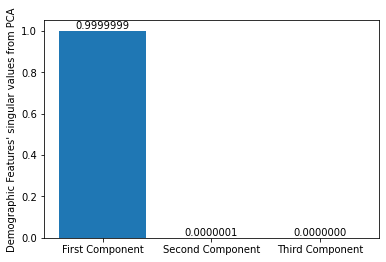

In [156]:
indexes = ['First Component', 'Second Component', 'Third Component']
values = pca_demo.explained_variance_ratio_
fig = plt.figure()
plt.bar(indexes, values)

# plt.title('title')
plt.ylabel('Demographic Features\' singular values from PCA') 
for a,b in zip(indexes, values):   #柱子上的数字显示
  plt.text(a,b,'%.7f'%b,ha='center',va='bottom',fontsize=10);
# plt.ylabel('y')      
plt.show()

In [157]:
 X_train_pca = pca_demo.transform(df_demo)
 X_train_pca2 = (df_demo - pca_demo.mean_).dot(pca_demo.components_.T)

In [159]:
pca_credit = PCA(n_components=3)
pca_credit.fit(df_credit)
print(pca_credit.explained_variance_ratio_)
print(pca_credit.singular_values_)

[0.93160654 0.06072672 0.00461503]
[22916022.46709722  5850768.05685923  1612910.04795747]


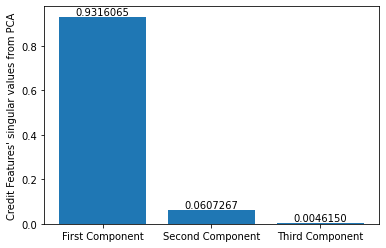

In [160]:
indexes = ['First Component', 'Second Component', 'Third Component']
values = pca_credit.explained_variance_ratio_
fig = plt.figure()
plt.bar(indexes, values)


for a,b in zip(indexes, values): 
  plt.text(a,b,'%.7f'%b,ha='center',va='bottom',fontsize=10);


plt.ylabel('Credit Features\' singular values from PCA') 
plt.show()

In [161]:
 pca_credit_reconstuct = pca_credit.transform(df_credit)
 pca_credit_reconstuct2 = (df_credit - pca_credit.mean_).dot(pca_credit.components_.T)

In [163]:
pca_marco = PCA(n_components=3)
pca_marco.fit(df_marco)
print(pca_marco.explained_variance_ratio_)
print(pca_marco.singular_values_)

[9.97464067e-01 2.53545163e-03 4.81418646e-07]
[1.69453995e+10 8.54340212e+08 1.17723899e+07]


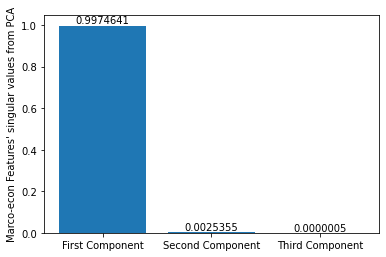

In [164]:
values = pca_marco.explained_variance_ratio_
fig = plt.figure()
plt.bar(indexes, values)

plt.ylabel('Marco-econ Features\' singular values from PCA') 
for a,b in zip(indexes, values):   
  plt.text(a,b,'%.7f'%b,ha='center',va='bottom',fontsize=10);     
plt.show()

In [165]:
 pca_marco_reconstuct = pca_marco.transform(df_marco)
 pca_marco_reconstuct2 = (df_marco - pca_marco.mean_).dot(pca_marco.components_.T)

In [166]:
pca_marco_reconstuct2

,0,1,2
0,4.190312e+07,-8.855519e+06,-95601.840807
1,4.305245e+07,-8.020441e+06,-84271.886721
2,-4.436573e+07,-7.624737e+05,-31459.575522
3,-4.454499e+07,-9.753472e+05,-40369.779765
4,3.220758e+08,-1.071437e+07,114642.674738
...,...,...,...
21678,-5.648727e+07,-1.381765e+06,5156.865698
21679,1.241173e+07,3.941968e+06,-70375.747413
21680,1.414372e+07,4.507680e+06,-60496.944936
21681,-5.299991e+07,-1.207517e+06,11875.458519


In [168]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [169]:
pca_df = pd.DataFrame({'demo': X_train_pca2[0], 'credit': pca_credit_reconstuct2[0], 'marco': pca_marco_reconstuct2[0], 'hardship':df_clean['hardship']})
pca_df = pca_df[pca_df['hardship'] == 0]

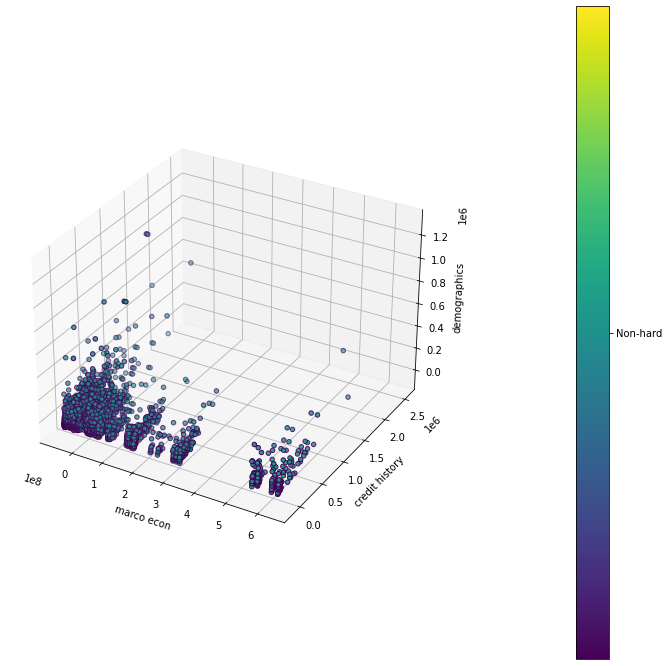

In [170]:
xs =  pca_df['demo'].values
ys = pca_df['credit'].values
zs = pca_df['marco'].values

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111, projection='3d')

scat_plot = ax.scatter(xs = zs, ys = ys, zs = xs, c=pca_df['hardship'].values)
ax.set_xlabel('marco econ')
ax.set_ylabel('credit history')
ax.set_zlabel('demographics')

cb = plt.colorbar(scat_plot, pad=0.2)

cb.set_ticks([0,1])

cb.set_ticklabels(["Non-hard", "Hard"])

plt.show()